In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 


import matplotlib
matplotlib.rcParams.update({'font.size': 15})

sns.set_theme(style="white", palette="pastel", font_scale=1.4)

In [84]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "Other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics",
                   "sc-transcriptomics":"Transcriptomics",
                   "sc-ATAC":"Epigenetics",
                   "proteome":"Proteomics"}

model_categories = {
    'VAE':"Autoencoder (variational)",
    'VNN (dense)':"Neural network (visible)",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder (variational & conditional)",
    'Graph Convolutional Network (GCN)':"Graph network (convolutional)",
    'AE (convolutional)':"Autoencoder (convolutional)",
    'LSTM (convolutional)':"LSTM (convolutional)",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network (visible & convolutional)",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder (stacked)",
    'VAE (sparse)':"Autoencoder (variational & sparse)",
    'Convolutional Neural Network (CNN)':"Neural network (convolutional)",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network (factor)",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder (sparse)",
    'Graph Network':"Graph network",
    "meta-learning":"other",
    np.nan:""
}

In [85]:
outPath = "figures"

pd_table1 = pd.read_csv("data/Table_4.csv")

In [86]:
#@title Models per Datatype


df = pd_table1.copy()
df["Data_type"] = df['Data type'].str.split(', ')
df["Model_architecture"] = df['Model architecture'].str.split(', ')

df = df.explode(["Data_type"])
df = df.explode(["Model_architecture"])


df["Data_type"] = df["Data_type"].values.astype(str)

''' change naming '''
df["Model_architecture"] = df["Model_architecture"].replace(model_categories)
df["Model_architecture"] = df["Model_architecture"].values.astype(str)
df["Data_type"] = df["Data_type"].replace(data_categories)

df = df.sort_values(["Model_architecture"], ascending=True)
df = df[~df["Data type"].isna()]




/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

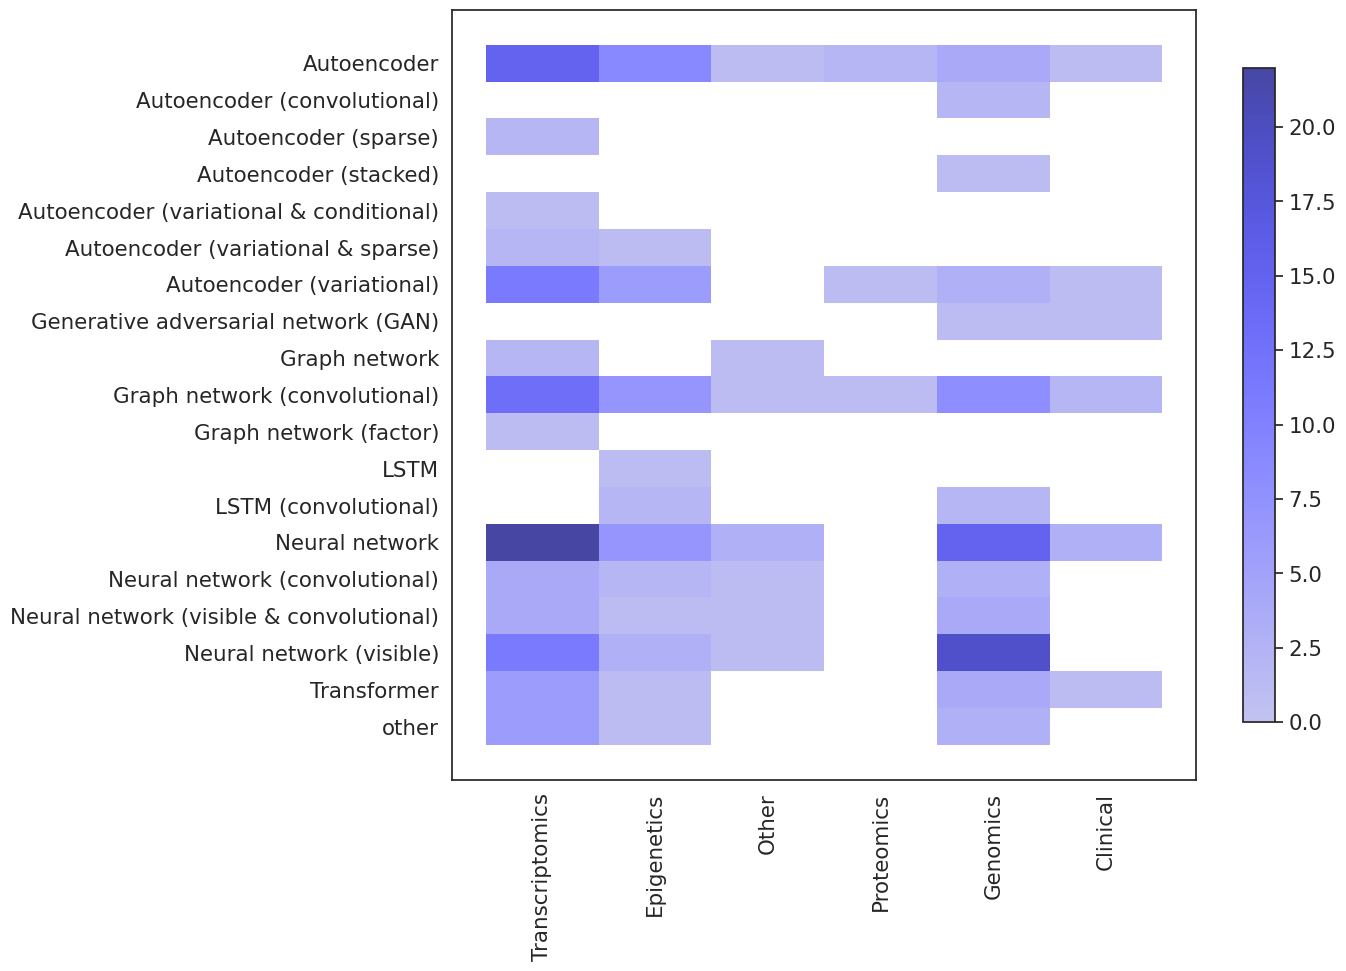

In [87]:
### Ploting
fig, ax = plt.subplots(ncols=1, figsize=(12, 10))
sns.histplot(df, x="Data_type", y ="Model_architecture", ax=ax, color="blue", cbar=True,  cbar_kws=dict(shrink=.85))
ax.set_ylabel("")
ax.set_xlabel("")


plt.xticks(rotation=90)


# plt.tight_layout()
# plt.savefig(f"{outPath}/model_dataType.png", dpi=300)
plt.show()


In [88]:
df = pd_table1.copy()
df["Data_type"] = df['Data type'].str.split(', ')
df["Model_architecture"] = df['Model architecture'].str.split(', ')

df = df.explode(["Data_type"])
df = df.explode(["Model_architecture"])


df["Data_type"] = df["Data_type"].values.astype(str)

''' change naming '''
df["Model_architecture"] = df["Model_architecture"].replace(model_categories)
df["Model_architecture"] = df["Model_architecture"].values.astype(str)
df["Data_type"] = df["Data_type"].replace(data_categories)

df = df.sort_values(["Model_architecture"], ascending=True)
df = df[~df["Data type"].isna()]


x = (df[["Data_type", "Model_architecture"]].value_counts() / df[["Data_type", "Model_architecture"]].value_counts().sum())*100
x = x.unstack().T
x

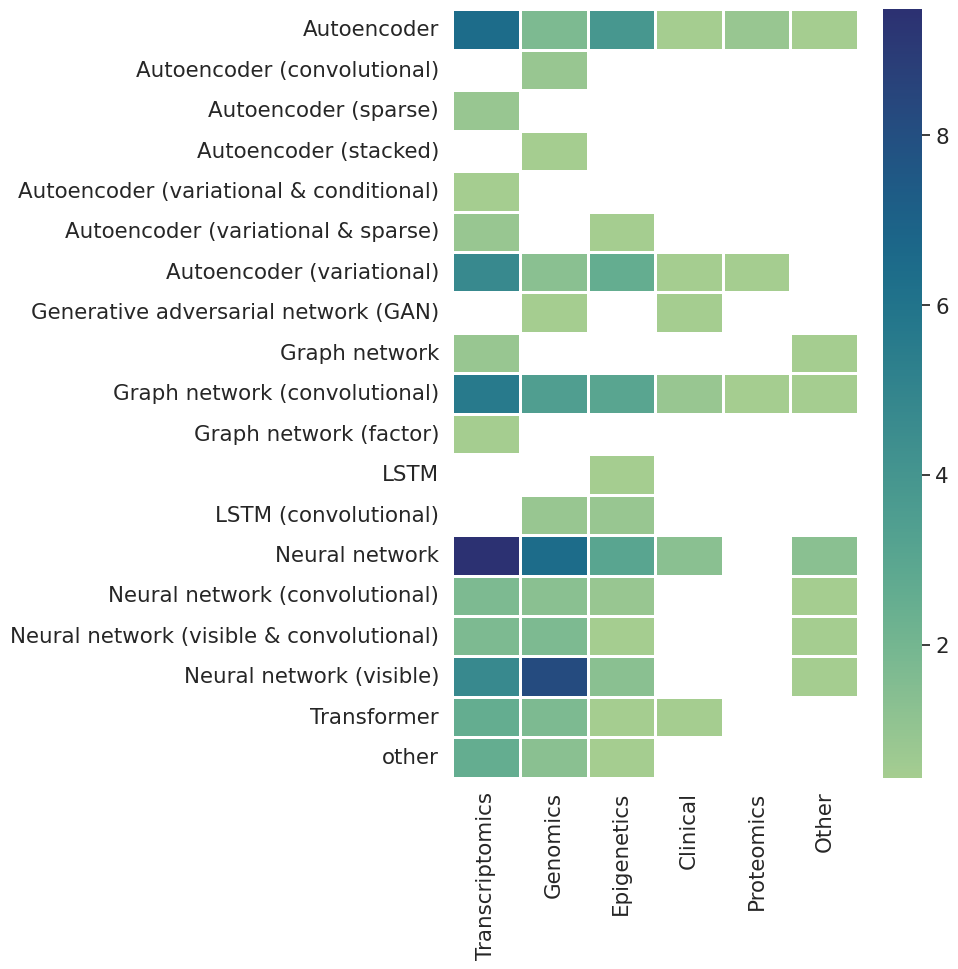

In [108]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
cols = ["Transcriptomics", "Genomics", "Epigenetics", "Clinical", "Proteomics", "Other"]
x = x.loc[:,cols]
sns.heatmap(x, cmap="crest",linewidths=2)
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(f"{outPath}/model_dataType.svg", dpi=300)